<a href="https://colab.research.google.com/github/lechemrc/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module1-linear-algebra-review/Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Scalars and Vectors

For the questions below it is not sufficient to simply provide answer to the questions, but you must solve the problems and show your work using python (the NumPy library will help a lot!) Translate the vectors and matrices into their appropriate python  representations and use numpy or functions that you write yourself to demonstrate the result or property. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Create a two-dimensional vector and plot it on a graph

[[4 1]
 [1 2]]


(-1, 6)

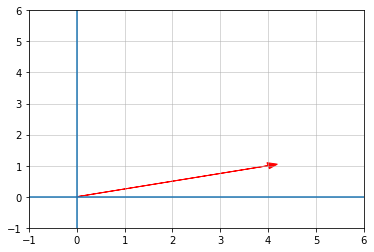

In [0]:
vec1 = np.random.randint(0, 6, size=(2, 2))
print(vec1)

#plotting 2d vector from origin
plt.arrow(0, 0, vec1[0, 0], vec1[1, 0], head_width=0.2, head_length=0.2, color='r')
plt.grid(linestyle='-', linewidth=.5)
plt.axhline(0)
plt.axvline(0)
plt.ylim(-1, 6)
plt.xlim(-1, 6)

## 1.2 Create a three-dimensional vector and plot it on a graph

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

[[[1 1 2 0 1]
  [4 1 3 2 4]
  [5 2 3 3 3]]]


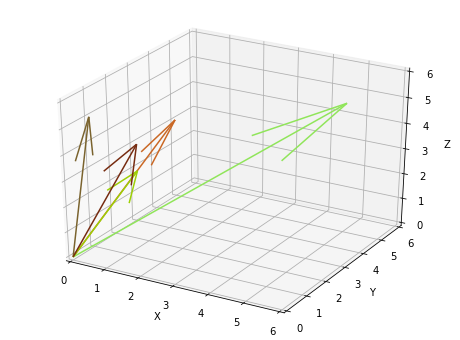

In [0]:
# creating a random array
vec_num = 5
vec2 = np.random.randint(0, 6, size=(1, 3, vec_num))
print(vec2)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# generating new line in new color for each vector
# transposing vector to loop through for new line
for val in b.T:  
  ax.quiver(0, 0, 0, val[0], val[1], val[2], color=np.random.rand(3,))
ax.set_ylim(0, 6)
ax.set_xlim(0, 6)
ax.set_zlim(0, 6)      
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')    
plt.show()

In [0]:
# testing my for loop to get it right for generating plot above

# vec3 = np.random.randint(0, 6, size=(1, 3, 6))
# print(vec3)

# for val in vec3.T:
#    print(val)

## 1.3 Scale the vectors you created in 1.1 by $5$, $\pi$, and $-e$ and plot all four vectors (original + 3 scaled vectors) on a graph. What do you notice about these vectors? 

In [0]:
from math import e, pi
print(e)
print(pi)

2.718281828459045
3.141592653589793


In [0]:
print(" *5 = \n", vec1*5, "\n\n", "*pi = \n", 
      vec1*pi, "\n\n", "*-e = \n", vec1*-e)

 *5 = 
 [[ 5 15]
 [10 10]] 

 *pi = 
 [[3.14159265 9.42477796]
 [6.28318531 6.28318531]] 

 *-e = 
 [[-2.71828183 -8.15484549]
 [-5.43656366 -5.43656366]]


## 1.4 Graph vectors $\vec{a}$ and $\vec{b}$ and plot them on a graph

\begin{align}
\vec{a} = \begin{bmatrix} 5 \\ 7 \end{bmatrix}
\qquad
\vec{b} = \begin{bmatrix} 3 \\4 \end{bmatrix}
\end{align}

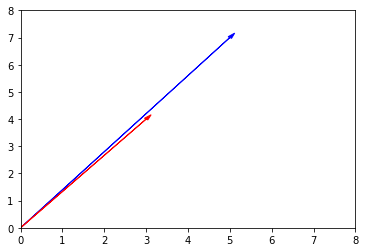

In [0]:
a = np.array([5, 7])
b = np.array([3, 4])

plt.arrow(0, 0, a[0], a[1], head_width=.1, head_length=.2, color='b')
plt.arrow(0, 0, b[0], b[1], head_width=.1, head_length=.2, color='r')
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

## 1.5 find $\vec{a} - \vec{b}$ and plot the result on the same graph as $\vec{a}$ and $\vec{b}$. Is there a relationship between vectors $\vec{a} \thinspace, \vec{b} \thinspace \text{and} \thinspace \vec{a-b}$

In [0]:
aa = np.array([5, 7])
print(aa[0])

5


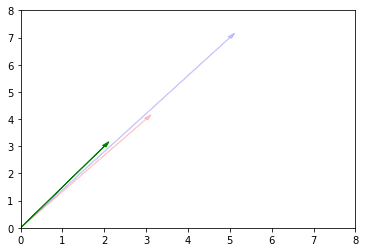

In [0]:
ab = a - b

# plotting with a and b vectors left in
plt.arrow(0, 0, a[0], a[1], head_width=.1, head_length=.2, color='b', alpha=0.2)
plt.arrow(0, 0, b[0], b[1], head_width=.1, head_length=.2, color='r', alpha=0.2)
plt.arrow(0, 0, ab[0], ab[1], head_width=.1, head_length=.2, color='g')
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

## 1.6 Find $c \cdot d$

\begin{align}
\vec{c} = \begin{bmatrix}7 & 22 & 4 & 16\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}12 & 6 & 2 & 9\end{bmatrix}
\end{align}


In [0]:
c = np.array([7, 22, 4, 16])
d = np.array([12, 6, 2, 9])

print(cd)

368


##  1.7 Find $e \times f$

\begin{align}
\vec{e} = \begin{bmatrix} 5 \\ 7 \\ 2 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\4 \\ 6 \end{bmatrix}
\end{align}

In [0]:
e = np.array([5, 7, 2])
print(e)
f = np.array([3, 4, 6])
print(f)

np.cross(e, f)

[5 7 2]
[3 4 6]


array([ 34, -24,  -1])

## 1.8 Find $||g||$ and then find $||h||$. Which is longer?

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 8 \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 3 \\3 \\ 3 \\ 3 \end{bmatrix}
\end{align}

In [0]:
# creating the arrays
g = np.array([1, 1, 1, 8]).reshape(4, 1)
print(g)
h = np.array([3, 3, 3, 3]).reshape(4, 1)
print(h)

# using the numpy function to check the norm (magnitude)
print(np.linalg.norm(g))
np.linalg.norm(h)

[[1]
 [1]
 [1]
 [8]]
[[3]
 [3]
 [3]
 [3]]
8.18535277187245


6.0

In [0]:
# it worked using numpy above! 

print(g)
print(h)

def vector_norm(vector):
  return (sum([vector[i]**2 for i in range(len(vector))])**.5)
          
print(vector_norm(g))
vector_norm(h)

[[1]
 [1]
 [1]
 [8]]
[[3]
 [3]
 [3]
 [3]]
[8.18535277]


array([6.])

# Part 2 - Matrices

## 2.1 What are the dimensions of the following matrices? Which of the following can be multiplied together? See if you can find all of the different legal combinations.
\begin{align}
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
B = \begin{bmatrix}
2 & 4 & 6 \\
\end{bmatrix}
\qquad
C = \begin{bmatrix}
9 & 6 & 3 \\
4 & 7 & 11
\end{bmatrix}
\qquad
D = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\qquad
E = \begin{bmatrix}
1 & 3 \\
5 & 7
\end{bmatrix}
\end{align}

In [0]:
# A is 3x2
# B is 1x3
# C is 2x3
# D is 3x3
# E is 2x2

A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([2, 4, 6])
C = np.array([[9, 6, 3], [4, 7, 11]])
D = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
E = np.array([[1, 3], [5, 7]])

In [0]:
# np.matmul(A, B) # doesn't work
# np.matmul(A, C) # doesn't work
# np.matmul(A, D) # doesn't work

print("A*E \n", np.matmul(A, E), "\n")
print("B*A \n", np.matmul(B, A), "\n")

# np.matmul(B, C) # doesn't work

print("B*D \n", np.matmul(B, D), "\n")

# np.matmul(B, E) # doesn't work

print("C*A \n", np.matmul(C, A), "\n")
print("C*B \n", np.matmul(C, B), "\n")
print("C*D \n", np.matmul(C, D), "\n")

# np.matmul(C, E) # doesn't work

print("D*A \n", np.matmul(D, A), "\n")
print("D*B \n", np.matmul(D, B), "\n")

# np.matmul(D, C) # doesn't work
# np.matmul(D, E) # doesn't work
# np.matmul(E, A) # doesn't work
# np.matmul(E, B) # doesn't work
# np.matmul(E, C) # doesn't work
# np.matmul(E, D) # doesn't work

A*E 
 [[11 17]
 [23 37]
 [35 57]] 

B*A 
 [44 56] 

B*D 
 [2 4 6] 

C*A 
 [[ 42  60]
 [ 80 102]] 

C*B 
 [ 60 102] 

C*D 
 [[ 9  6  3]
 [ 4  7 11]] 

D*A 
 [[1 2]
 [3 4]
 [5 6]] 

D*B 
 [2 4 6] 



## 2.2 Find the following products: CD, AE, and BA. What are the dimensions of the resulting matrices? How does that relate to the dimensions of their factor matrices?

In [0]:
# the first matrix row number and second matrix column number determine shape 

print("C*D \n", np.matmul(C, D), "\n") # 2x3 * 3x3
# (2)x3 * 3x(3)  = 2x3

print("A*E \n", np.matmul(A, E), "\n") # 3x2 * 2x2
# (3)x2 * 2x(2)  = 3x2

print("B*A \n", np.matmul(B, A), "\n") # 1x3 * 3x2
# (1)x3 * 3x(2)  = 1x2

C*D 
 [[ 9  6  3]
 [ 4  7 11]] 

A*E 
 [[11 17]
 [23 37]
 [35 57]] 

B*A 
 [44 56] 



## 2.3  Find $F^{T}$. How are the numbers along the main diagonal (top left to bottom right) of the original matrix and its transpose related? What are the dimensions of $F$? What are the dimensions of $F^{T}$?

\begin{align}
F = 
\begin{bmatrix}
20 & 19 & 18 & 17 \\
16 & 15 & 14 & 13 \\
12 & 11 & 10 & 9 \\
8 & 7 & 6 & 5 \\
4 & 3 & 2 & 1
\end{bmatrix}
\end{align}

In [0]:
F = np.array([[20, 19, 18, 17],
              [16, 15, 14, 13],
              [12, 11, 10, 9],
              [8, 7, 6, 5],
              [4, 3, 2, 1]])
# Dimensions of F are 5x4

F.T 
# Dimensions of F.T are 4x5

# The 4 and 17 essentially swap corners if you can think of the whole shape 
# flipping in that direction 

array([[20, 16, 12,  8,  4],
       [19, 15, 11,  7,  3],
       [18, 14, 10,  6,  2],
       [17, 13,  9,  5,  1]])

# Part 3 - Square Matrices

## 3.1 Find $IG$ (be sure to show your work) 

\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\end{align}

In [0]:
# Done by hand

G = np.array([[12, 11],
     [7, 10]])
print('a ', G[0,0])
print('b ', G[0,1])
print('c ', G[1,0])
print('d ', G[1,1])

g = np.array([[10, -11], [7, 12]])
rec = (1/(12*10 - 11*7))
print(rec)

Ginv = rec * g
print(Ginv)

a  12
b  11
c  7
d  10
0.023255813953488372
[[ 0.23255814 -0.25581395]
 [ 0.1627907   0.27906977]]


In [0]:
# done with numpy
print(G)

G_inv = np.linalg.inv(G)
print(G_inv)

IG = np.matmul(G_inv, G)
IG

[[12 11]
 [ 7 10]]
[[ 0.23255814 -0.25581395]
 [-0.1627907   0.27906977]]


array([[1.00000000e+00, 6.66133815e-16],
       [1.11022302e-16, 1.00000000e+00]])

 
\begin{align}
G^{-1}G =IG= 
\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}
\end{align}

## 3.2 Find $|H|$ and then find $|J|$.

\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}


In [3]:
H = np.array([[12, 11], [7, 10]])
J = np.array([[0, 1, 2],[7, 10, 4],[3, 2, 0]])

print(np.linalg.det(H))
print(np.linalg.det(J))

43.000000000000014
-19.999999999999996


## 3.3 Find $H^{-1}$ and then find $J^{-1}$

In [8]:
print(np.linalg.inv(H), '\n')
print(np.linalg.inv(J))

[[ 0.23255814 -0.25581395]
 [-0.1627907   0.27906977]] 

[[ 0.4  -0.2   0.8 ]
 [-0.6   0.3  -0.7 ]
 [ 0.8  -0.15  0.35]]


## 3.4 Find $HH^{-1}$ and then find $J^{-1}J$. Is $HH^{-1} == J^{-1}J$? Why or Why not?

In [14]:
H_inv = np.linalg.inv(H)
J_inv = np.linalg.inv(J)

H_id = np.matmul(H, H_inv)
J_id = np.matmul(J, J_inv)

print(H_id, '\n')
print(J_id)

# assert(H_id == J_id)

[[1.00000000e+00 5.55111512e-16]
 [2.22044605e-16 1.00000000e+00]] 

[[ 1.00000000e+00 -5.55111512e-17  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [0]:
# The above code does not equal each other, mainly because they are 
# matrices with different dimensions. Had they had the same dimensions
# they would have.

# Stretch Goals: 

A reminder that these challenges are optional. If you finish your work quickly we welcome you to work on them. If there are other activities that you feel like will help your understanding of the above topics more, feel free to work on that. Topics from the Stretch Goals sections will never end up on Sprint Challenges. You don't have to do these in order, you don't have to do all of them. 

- Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.
- Write a function that can calculate the norm of any vector
- Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them. 
- Research how to plot a 3d graph with animations so that you can make the graph rotate (this will be easier in a local notebook than in google colab)
- Create and plot a matrix on a 2d graph.
- Create and plot a matrix on a 3d graph.
- Plot two vectors that are not collinear on a 2d graph. Calculate the determinant of the 2x2 matrix that these vectors form. How does this determinant relate to the graphical interpretation of the vectors?

